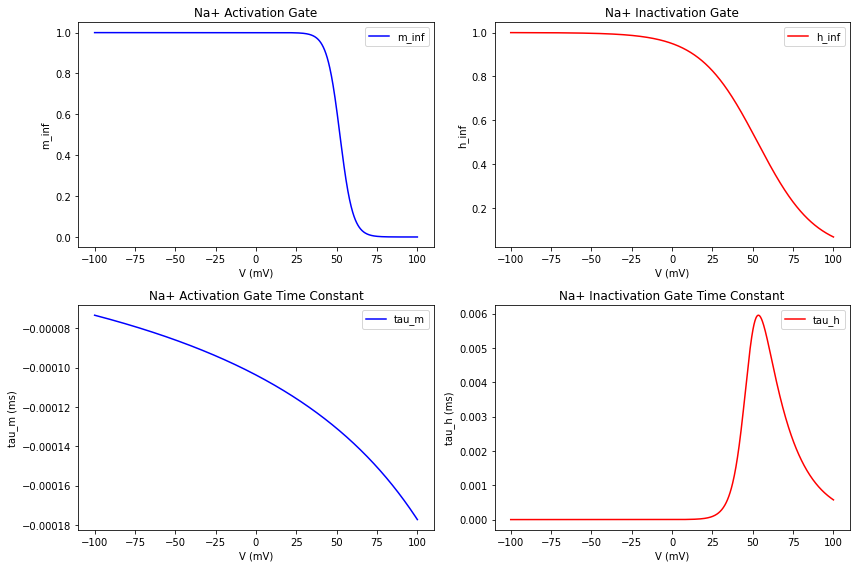

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Define voltage range
V = np.linspace(-100, 100, 1000)

# Parameters for Na+ activation gate
am = lambda V: 0.32 * (V - 52) * 1e3  # kHz/mV
bm = lambda V: 0.28 * (25 - V) * 1e3   # kHz/mV
m_inf = lambda V: 1 / (1 + np.exp((V - 52) / 4))
tau_m = lambda V: 1 / (am(V) + bm(V))

# Parameters for Na+ inactivation gate
ah = lambda V: 0.128 * np.exp((V - 53) / 18) * 1e3  # kHz
bh = lambda V: 4 * 1e3 * np.exp((30 - V) / 5)
h_inf = lambda V: 1 / (1 + np.exp((V - 53) / 18))
tau_h = lambda V: 1 / (ah(V) + bh(V))

# Parameters for K+ activation gate
an = lambda V: 0.016 * (V - 35) * 1e3  # kHz/mV
bn = lambda V: 0.25 * np.exp((50 - V) / 40) * 1e3   # kHz/mV
n_inf = lambda V: 1 / (1 + np.exp((35 - V) / 5))
tau_n = lambda V: 1 / (an(V) + bn(V))

# Plot activation and inactivation gating variables
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(V, m_inf(V), 'b-', label='m_inf')
axs[0, 0].set_title("Na+ Activation Gate")
axs[0, 0].legend(loc='best')
axs[0, 0].set_xlabel('V (mV)')
axs[0, 0].set_ylabel('m_inf')

axs[0, 1].plot(V, h_inf(V), 'r-', label='h_inf')
axs[0, 1].set_title("Na+ Inactivation Gate")
axs[0, 1].legend(loc='best')
axs[0, 1].set_xlabel('V (mV)')
axs[0, 1].set_ylabel('h_inf')

axs[1, 0].plot(V, tau_m(V), 'b-', label='tau_m')
axs[1, 0].set_title("Na+ Activation Gate Time Constant")
axs[1, 0].legend(loc='best')
axs[1, 0].set_xlabel('V (mV)')
axs[1, 0].set_ylabel('tau_m (ms)')

axs[1, 1].plot(V, tau_h(V), 'r-', label='tau_h')
axs[1, 1].set_title("Na+ Inactivation Gate Time Constant")
axs[1, 1].legend(loc='best')
axs[1, 1].set_xlabel('V (mV)')
axs[1, 1].set_ylabel('tau_h (ms)')

plt.tight_layout()
plt.show()



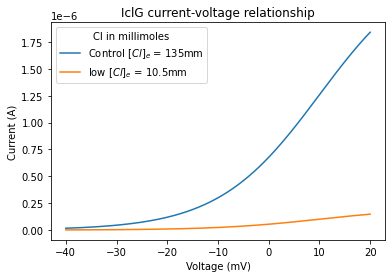

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln

# Define the parameters
F = 96485.333  # C/mol
R = 8.3144598  # (C/V)/(mol K)
T = 310  # K 
Cl_i = 7e-3  # mol/L
PClG = 19.5e-6  # m^3/s

# Define the IclG function
def IclG(v, Cl_e):
    # Redefining their constants in terms of the nernst equilibrium
    con = R*T/F*ln(Cl_e/Cl_i)
    return PClG / (1 + np.exp(-1*(v - 10)/10)) * -con * (Cl_i - Cl_e * np.exp(-con) / (1 - np.exp(-con)))

# Set the voltage range
voltage = np.linspace(-40, 20, 1000)

# Compute IclG for each voltage value
current = [IclG(v, 135e-3) for v in voltage]
current1 = [IclG(v, 10.5e-3) for v in voltage]


plt.plot(voltage, current)
plt.plot(voltage, current1)  
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (A)')
plt.title('IclG current-voltage relationship')
plt.legend(['Control $[Cl]_e$ = 135mm', 'low $[Cl]_e$ = 10.5mm'], title = 'Cl in millimoles',)
plt.show()